In [1]:
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data.shape

(891, 12)

In [7]:
fig  = plt.figure()
fig.set(alpha  = 0.2)

[None]

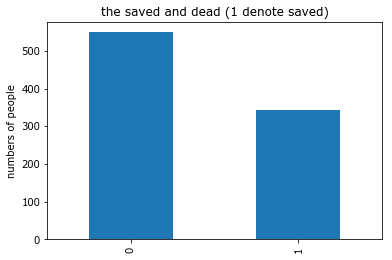

In [8]:
train_data.Survived.value_counts().plot(kind = 'bar')
plt.title('the saved and dead (1 denote saved)')
plt.ylabel(u'numbers of people')
plt.show()

In [9]:
train_data.Pclass.value_counts().plot(kind = 'bar')
plt.ylabel('numbers')
plt.title("the distrubution of the class")

Text(0.5,1,'the distrubution of the class')

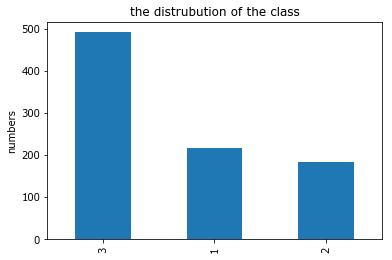

In [10]:
plt.show()

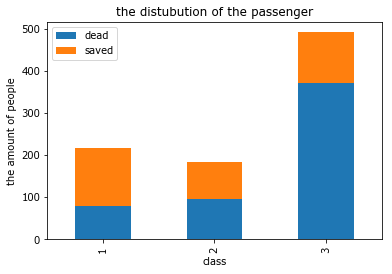

In [11]:
alive0 = train_data.Pclass[train_data.Survived ==0 ].value_counts()
alive1 = train_data.Pclass[train_data.Survived ==1 ].value_counts()
df = pd.DataFrame({'dead':alive0, 'saved':alive1})
df.plot(kind = 'bar' ,stacked = True)
plt.title("the distubution of the passenger")
plt.xlabel("class")
plt.ylabel("the amount of people")
plt.show()

In [12]:
type(alive0)

pandas.core.series.Series

In [13]:
alive0

3    372
2     97
1     80
Name: Pclass, dtype: int64

In [14]:
alive1

1    136
3    119
2     87
Name: Pclass, dtype: int64

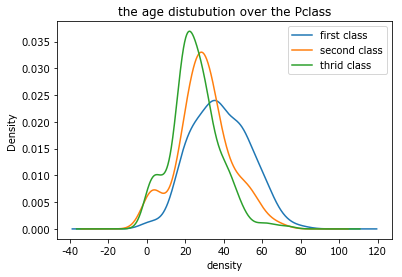

In [15]:
train_data.Age[train_data.Pclass == 1].plot(kind = 'kde')
train_data.Age[train_data.Pclass == 2].plot(kind = 'kde')
train_data.Age[train_data.Pclass == 3].plot(kind = 'kde')
plt.xlabel("density")
plt.title("the age distubution over the Pclass")
plt.legend(("first class", "second class", "thrid class"),loc = "best")
plt.show()

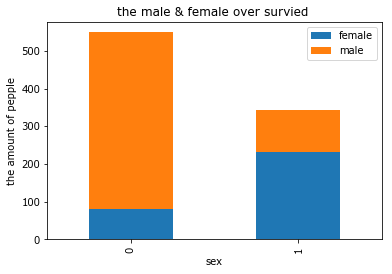

In [16]:
# check the sex over the survived
male = train_data.Survived[train_data.Sex == "male"].value_counts()
female = train_data.Survived[train_data.Sex == "female"].value_counts()
df = pd.DataFrame({"male":male, "female":female})
df.plot(kind = 'bar',stacked = True)
plt.title("the male & female over survied ")
plt.xlabel("sex")
plt.ylabel("the amount of pepple")
plt.show()

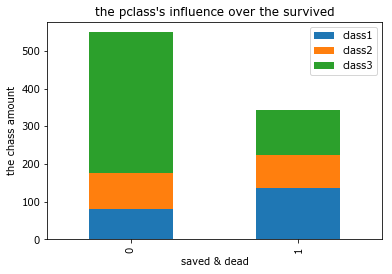

In [17]:
## check the influence of the Pclass
pclass1 = train_data.Survived[train_data.Pclass == 1].value_counts()
pclass2 = train_data.Survived[train_data.Pclass == 2].value_counts()
pclass3 = train_data.Survived[train_data.Pclass == 3].value_counts()
df = pd.DataFrame({"class1":pclass1, "class2": pclass2, "class3": pclass3})
df.plot(kind = 'bar', stacked = True)
plt.title("the pclass's influence over the survived")
plt.xlabel("saved & dead")
plt.ylabel("the chass amount")
plt.show()

In [18]:
#  处理Age 特征
values = train_data.Age.mean()
values

29.69911764705882

In [19]:
###  舍去名字的一列
train_data = train_data.drop(['Name', 'Cabin'],axis = 1)

In [20]:
replace_values = {"Age":values}
train_data = train_data.fillna(value= replace_values)

In [21]:
### encodeing for sex 
train_data.loc[train_data['Sex'] == 'male','Sex'] = 0
train_data.loc[train_data['Sex'] == 'female','Sex'] = 1

In [22]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [23]:
train_data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [24]:
### 填充 Embarked
train_data.Embarked = train_data.Embarked.fillna('S')

In [25]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [26]:
### encoding the feature Embarked
train_data.loc[train_data.Embarked == 'S' ,'Embarked'] = 0
train_data.loc[train_data.Embarked == 'C' ,'Embarked'] = 1
train_data.loc[train_data.Embarked == 'Q' ,'Embarked'] = 2

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold
predictor = ['Survived','Pclass', 'Sex', 'Age', 'SibSp','Parch','Fare','Embarked']

F:\anacoda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [28]:
test_data.loc[test_data.Sex == 'male', 'Sex'] =0
test_data.loc[test_data.Sex == 'female', 'Sex'] =1

In [29]:
test_data['Age'].unique()

array([ 34.5 ,  47.  ,  62.  ,  27.  ,  22.  ,  14.  ,  30.  ,  26.  ,
        18.  ,  21.  ,    nan,  46.  ,  23.  ,  63.  ,  24.  ,  35.  ,
        45.  ,  55.  ,   9.  ,  48.  ,  50.  ,  22.5 ,  41.  ,  33.  ,
        18.5 ,  25.  ,  39.  ,  60.  ,  36.  ,  20.  ,  28.  ,  10.  ,
        17.  ,  32.  ,  13.  ,  31.  ,  29.  ,  28.5 ,  32.5 ,   6.  ,
        67.  ,  49.  ,   2.  ,  76.  ,  43.  ,  16.  ,   1.  ,  12.  ,
        42.  ,  53.  ,  26.5 ,  40.  ,  61.  ,  60.5 ,   7.  ,  15.  ,
        54.  ,  64.  ,  37.  ,  34.  ,  11.5 ,   8.  ,   0.33,  38.  ,
        57.  ,  40.5 ,   0.92,  19.  ,  36.5 ,   0.75,   0.83,  58.  ,
         0.17,  59.  ,  14.5 ,  44.  ,   5.  ,  51.  ,   3.  ,  38.5 ])

In [30]:
value_test = test_data.Age.mean()
value_test

30.272590361445783

In [31]:
value_dict = {"Age":value_test}
test_data = test_data.fillna(value= value_dict)

In [32]:
test_data.Embarked.unique()

array(['Q', 'S', 'C'], dtype=object)

In [33]:
test_data.loc[test_data.Embarked == 'S' ,'Embarked'] = 0
test_data.loc[test_data.Embarked == 'C' ,'Embarked'] = 1
test_data.loc[test_data.Embarked == 'Q' ,'Embarked'] = 2

In [34]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.50000,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.00000,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0,27.00000,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.00000,1,1,3101298,12.2875,NaN,0
5,897,3,"Svensson, Mr. Johan Cervin",0,14.00000,0,0,7538,9.2250,NaN,0
6,898,3,"Connolly, Miss. Kate",1,30.00000,0,0,330972,7.6292,NaN,2
7,899,2,"Caldwell, Mr. Albert Francis",0,26.00000,1,1,248738,29.0000,NaN,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.00000,0,0,2657,7.2292,NaN,1
9,901,3,"Davies, Mr. John Samuel",0,21.00000,2,0,A/4 48871,24.1500,NaN,0


In [35]:
train_df  = train_data[predictor]

In [36]:
train_np = train_df.as_matrix()

In [37]:
X = train_np[:,1:]
X.shape
y = train_np[:,0]
y.shape
y = y.astype('int')

In [38]:
from sklearn import linear_model
X.astype('float64')

array([[  3.        ,   0.        ,  22.        , ...,   0.        ,
          7.25      ,   0.        ],
       [  1.        ,   1.        ,  38.        , ...,   0.        ,
         71.2833    ,   1.        ],
       [  3.        ,   1.        ,  26.        , ...,   0.        ,
          7.925     ,   0.        ],
       ..., 
       [  3.        ,   1.        ,  29.69911765, ...,   2.        ,
         23.45      ,   0.        ],
       [  1.        ,   0.        ,  26.        , ...,   0.        ,
         30.        ,   1.        ],
       [  3.        ,   0.        ,  32.        , ...,   0.        ,
          7.75      ,   2.        ]])

In [39]:
clf = linear_model.LogisticRegression(C=1.0, penalty='l1',tol=1e-6)
clf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False)

In [40]:
test_attribute = predictor

In [41]:
test_attribute = test_attribute[1:]

In [42]:
test_attribute

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [43]:
test = test_data[test_attribute]

In [44]:
test.Pclass.unique()

array([3, 2, 1], dtype=int64)

In [45]:
Fare_value = test.Fare.mean()
Fare_dict = {'Fare': Fare_value}
test = test.fillna(value= Fare_dict)

In [46]:
test = test.astype('float64')

In [47]:
test = test.as_matrix()

In [48]:
test.shape

(418, 7)

In [50]:
pre = clf.predict(test)
import numpy as np

In [51]:
result = pd.DataFrame({"PassengerId": test_data["PassengerId"].as_matrix(),"Survived": pre.astype(np.int32)})
result.to_csv("final.csv", index = False)